import modules

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

import seaborn as sns
import matplotlib.pyplot as plt # กลุ่ม library สำหรับพล็อตกราฟ

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler # กลุ่ม library สำหรับทำ machine learning

In [ ]:
drive.mount('/content/drive')
path = "/content/drive/My Drive/winequality-red.csv"
wine_df = pd.read_csv(path,sep=";")
wine_df.head(10)

Mounted at /content/drive


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [ ]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine_df.isna().sum()
#data = data.dropna() drop ข้อมูลที่เป็น null

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

no missing value

In [ ]:
df_copy = wine_df.copy()

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df_copy['alcohol'].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       , 10.5       ,
        9.2       ,  9.9       ,  9.1       ,  9.3       ,  9.        ,
        9.7       , 10.1       , 10.6       ,  9.6       , 10.8       ,
       10.3       , 13.1       , 10.2       , 10.9       , 10.7       ,
       12.9       , 10.4       , 13.        , 14.        , 11.5       ,
       11.4       , 12.4       , 11.        , 12.2       , 12.8       ,
       12.6       , 12.5       , 11.7       , 11.3       , 12.3       ,
       12.        , 11.9       , 11.8       ,  8.7       , 13.3       ,
       11.2       , 11.6       , 11.1       , 13.4       , 12.1       ,
        8.4       , 12.7       , 14.9       , 13.2       , 13.6       ,
       13.5       , 10.03333333,  9.55      ,  8.5       , 11.06666667,
        9.56666667, 10.55      ,  8.8       , 13.56666667, 11.95      ,
        9.95      ,  9.23333333,  9.25      ,  9.05      , 10.75      ])

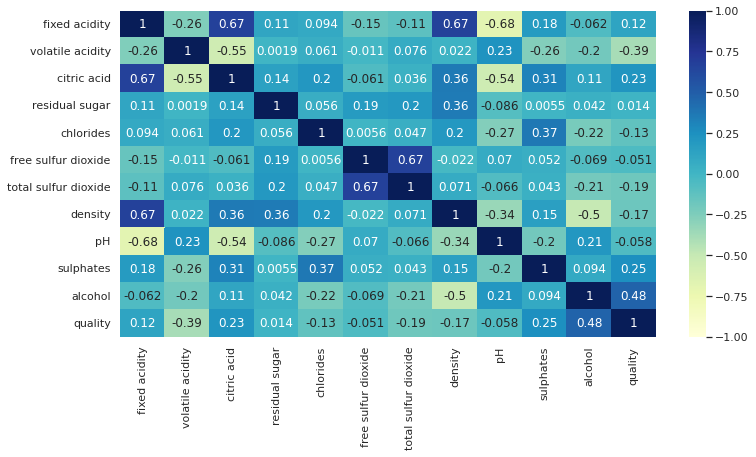

In [ ]:
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(df_copy[df_copy.columns].corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')

In [ ]:
df_copy.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
# df_copy = df_copy.drop(['density','volatile acidity','total sulfur dioxide','chlorides','free sulfur dioxide','pH'], axis=1)
df_copy = df_copy.drop(['density','volatile acidity','total sulfur dioxide','chlorides'], axis=1)

In [ ]:
#df_copy['id'] = df_copy.index

In [ ]:
#df_copy.set_index('id')

In [ ]:
df_copy

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.00,1.9,11.0,3.51,0.56,9.4,5
1,7.8,0.00,2.6,25.0,3.20,0.68,9.8,5
2,7.8,0.04,2.3,15.0,3.26,0.65,9.8,5
3,11.2,0.56,1.9,17.0,3.16,0.58,9.8,6
4,7.4,0.00,1.9,11.0,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,32.0,3.45,0.58,10.5,5
1595,5.9,0.10,2.2,39.0,3.52,0.76,11.2,6
1596,6.3,0.13,2.3,29.0,3.42,0.75,11.0,6
1597,5.9,0.12,2.0,32.0,3.57,0.71,10.2,5


In [ ]:
x_df = df_copy.drop(['quality'],axis=1)

In [ ]:
x_df

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,pH,sulphates,alcohol
0,7.4,0.00,1.9,11.0,3.51,0.56,9.4
1,7.8,0.00,2.6,25.0,3.20,0.68,9.8
2,7.8,0.04,2.3,15.0,3.26,0.65,9.8
3,11.2,0.56,1.9,17.0,3.16,0.58,9.8
4,7.4,0.00,1.9,11.0,3.51,0.56,9.4
...,...,...,...,...,...,...,...
1594,6.2,0.08,2.0,32.0,3.45,0.58,10.5
1595,5.9,0.10,2.2,39.0,3.52,0.76,11.2
1596,6.3,0.13,2.3,29.0,3.42,0.75,11.0
1597,5.9,0.12,2.0,32.0,3.57,0.71,10.2


In [ ]:
# เพื่มทำการ normalize ด้วย StandardScaler
# Normalize 
from sklearn.preprocessing import Normalizer,StandardScaler
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_df)

In [ ]:
x_norm

array([[-0.52835961, -1.39147228, -0.45321841, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743, -1.39147228,  0.04341614, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743, -1.18607043, -0.16942723, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.72391627, -0.16942723, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528, -0.77526673, -0.38227061, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223,  1.02199944,  0.75289408, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [ ]:
y_df = df_copy['quality'].values

In [ ]:
y_df

array([5, 5, 5, ..., 6, 5, 6])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y_df, test_size=0.3, random_state=42)

In [ ]:
print("Train shape: ", x_train.shape)
print("Test shape: ", x_test.shape)

Train shape:  (1119, 7)
Test shape:  (480, 7)


Train Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# ทดสอบประสิทธิภาพของ model ด้วยค่า RMSE
from sklearn.metrics import mean_squared_error

def evaluate(X, Y, model):
  pred = model.predict(X)
  return mean_squared_error(pred, Y)**0.5

Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
RMSE_lr = round(evaluate(x_test, y_test , model = lr), 2)
print(f"Linear Regression RMSE: {RMSE_lr}")


Linear Regression RMSE: 0.68


Multi Layer Perceptron

In [ ]:
# ทำนายค่า quality
y_predict = lr.predict(x_test)
y_predict

array([5.28796665, 5.12070744, 5.7029116 , 5.31390263, 5.61270939,
       5.10696287, 5.31764523, 5.257814  , 5.51661395, 5.68620913,
       6.30689741, 5.3137523 , 5.28062532, 5.08088617, 5.21424602,
       6.31755825, 5.33973688, 5.53370724, 6.40824528, 5.44861213,
       5.46946628, 5.04419026, 6.02612483, 6.37740379, 5.27385861,
       5.26775958, 6.28826238, 5.44114752, 5.18667489, 5.82697953,
       5.27418426, 5.31252209, 5.41542479, 5.4340923 , 5.36285081,
       5.06314755, 6.05392421, 5.66414164, 5.76445129, 5.96432157,
       5.594173  , 5.15828026, 5.85591647, 5.39915862, 5.73392743,
       5.8266295 , 6.14420387, 5.36360727, 5.61069594, 5.51016334,
       5.42607713, 5.62025033, 5.71841099, 6.59558895, 5.08529658,
       5.16500506, 5.99202551, 5.49965565, 5.67337254, 5.30798555,
       5.38264601, 5.76633778, 5.1056892 , 5.13794328, 6.31862316,
       5.13617514, 6.2531463 , 5.32087558, 6.29845234, 5.27230166,
       6.34673267, 5.13628601, 5.42597115, 5.73048548, 6.16902

In [ ]:
mlp_hid_size = 1
mlp = MLPRegressor(hidden_layer_sizes = mlp_hid_size) 
mlp.fit(x_train, y_train)
RMSE_mlp = round(evaluate(x_test, y_test , model = mlp), 2)
print(f"Multi Layer Perceptron RMSE: {RMSE_mlp}")

Multi Layer Perceptron RMSE: 4.64


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
y_mlp_predict = mlp.predict(x_test)

In [ ]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
RMSE_rand = round(evaluate(x_test, y_test , model = regr), 2)
print(f"Random Forest Regression RMSE: {RMSE_rand}")

Random Forest Regression RMSE: 0.69


In [ ]:
y_regr_predict = regr.predict(x_test)
y_regr_predict

array([5.51148639, 5.14173017, 5.52177189, 5.1695823 , 5.76777642,
       5.14173017, 5.35586021, 5.19179631, 5.52177189, 5.96622847,
       6.2700879 , 5.51292077, 5.49128361, 5.35586021, 5.35586021,
       5.84237421, 5.21964844, 5.56735559, 6.44546318, 5.52177189,
       5.43965084, 5.35586021, 5.82492152, 6.10044932, 5.35586021,
       5.52177189, 6.2700879 , 5.22329118, 5.52177189, 5.60348889,
       5.1695823 , 5.19179631, 5.52177189, 5.19179631, 5.52177189,
       5.14173017, 6.15728922, 5.92494232, 5.49348415, 5.71846968,
       5.22136983, 5.16069809, 5.65353827, 5.51148639, 5.52177189,
       5.65353827, 6.00833889, 5.43019667, 5.43965084, 5.50132159,
       5.52177189, 5.52177189, 5.79145463, 6.42801048, 5.30248338,
       5.43803411, 6.13983653, 5.60348889, 5.43965084, 5.51148639,
       5.41243466, 5.89513094, 5.17322504, 5.1695823 , 6.43872946,
       5.1695823 , 6.21544024, 5.52177189, 6.44546318, 5.43803411,
       5.83622469, 5.43019667, 5.52177189, 5.57153559, 6.19798

In [ ]:
pred_df = pd.DataFrame()

array([[-0.35600048, -0.98066858, -0.02753165,  0.01092425, -0.77251161],
       [-0.29854743, -0.51851442, -0.66606179, -1.05131114, -0.86637886],
       [ 1.36759086, -0.26176211,  0.11436394,  1.89934271, -0.49090986],
       ...,
       [-0.93053092, -0.15906119, -0.59511399, -0.34315421,  0.16616088],
       [ 1.25268477,  1.8949573 , -0.09847944,  0.01092425,  1.29256787],
       [ 0.9079665 , -0.15906119, -0.16942723, -0.81525883, -0.39704261]])

In [ ]:
# pred_df['id'] = y_test.index
pred_df['quality'] = y_test
pred_df['quality_lr'] = y_predict
pred_df['quality_mlp'] = y_mlp_predict
pred_df['quality_regr'] = y_regr_predict
# pred_df.sort_values(by='id')

In [ ]:
pred_df

,quality,quality_lr,quality_mlp,quality_regr
0,6,5.287967,4.331051,5.511486
1,5,5.120707,5.731873,5.141730
2,6,5.702912,0.473258,5.521772
3,5,5.313903,3.867436,5.169582
4,6,5.612709,5.487733,5.767776
...,...,...,...,...
475,7,5.463766,4.388528,5.587558
476,8,5.966568,0.473258,5.992860
477,6,5.612709,5.487733,5.767776
478,7,6.306897,0.473258,6.270088


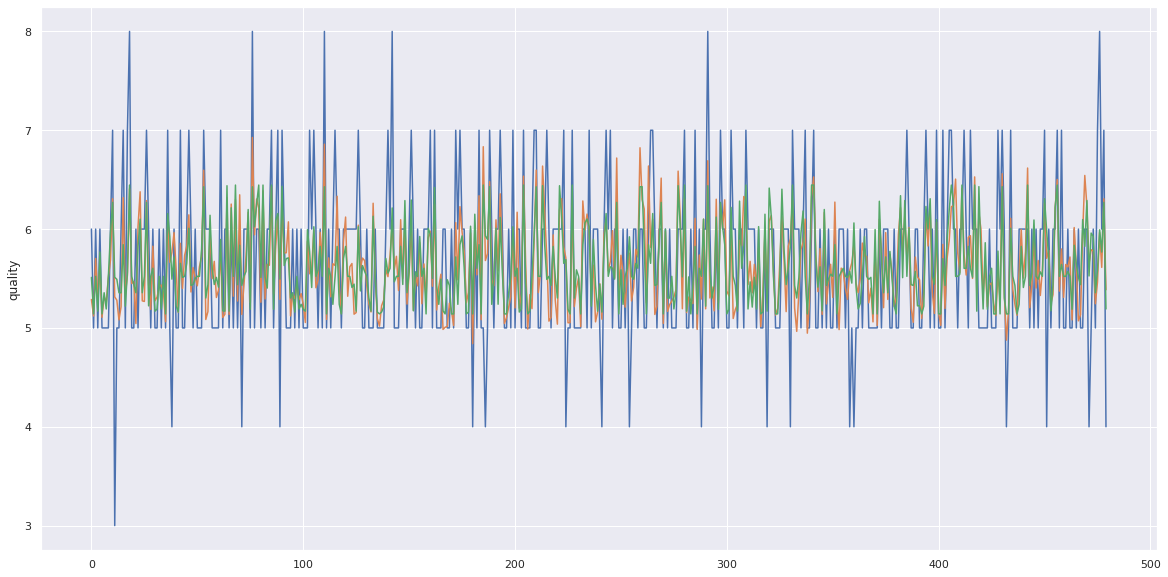

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x =  pred_df.index , y = pred_df['quality'])
sns.lineplot(x = pred_df.index,  y = pred_df['quality_lr'])
sns.lineplot(x = pred_df.index,  y = pred_df['quality_regr'])

In [ ]:
sns